In [1]:
include("model.jl")
include("Parser.jl")
include("greedy.jl")
include("utils.jl")
using JuMP
using HiGHS

In [ ]:
#Change the instance to have different plot (Note that instances with >= 100 localities take a long time to run)
n, m, x_VC, y_VC, x_loc, y_loc, Q, C, q, f, p, tc, B, R, localities_with_high_priorities, M = parse_instance("./Instances/coord50-5-1_processed.dat")

(50, 5, [42.0, 2.0, 5.0, 14.0, 43.0], [6.0, 39.0, 45.0, 8.0, 3.0], [28.0, 33.0, 45.0, 14.0, 50.0, 17.0, 1.0, 39.0, 8.0, 17.0  …  23.0, 3.0, 15.0, 38.0, 42.0, 12.0, 47.0, 24.0, 14.0, 44.0], [23.0, 5.0, 13.0, 3.0, 32.0, 45.0, 22.0, 36.0, 8.0, 9.0  …  3.0, 49.0, 18.0, 50.0, 31.0, 23.0, 22.0, 24.0, 17.0, 20.0], 70, [420, 420, 350, 350, 350], [19, 17, 19, 18, 14, 19, 20, 13, 11, 16  …  18, 12, 16, 17, 11, 18, 14, 16, 15, 15], [10356, 9744, 5029, 10057, 13647], 1000, 0, 14309.914850942907, [17.41551032843999, 14.606201887781136, 16.384384091012336, 13.689964180456508, 17.33901748690329], [26, 39, 11, 21, 5], 5)

In [4]:
A,D = preprocess(n, m, x_VC, y_VC, x_loc, y_loc, R)

([0 1 … 0 1; 0 0 … 0 0; … ; 0 0 … 1 0; 0 1 … 0 1], [0.0 18.681541692269406 … 20.518284528683193 25.0; 18.681541692269406 0.0 … 19.235384061671343 10.198039027185569; … ; 20.518284528683193 19.235384061671343 … 0.0 29.427877939124322; 25.0 10.198039027185569 … 29.427877939124322 0.0])

## Without greedy initialization ##

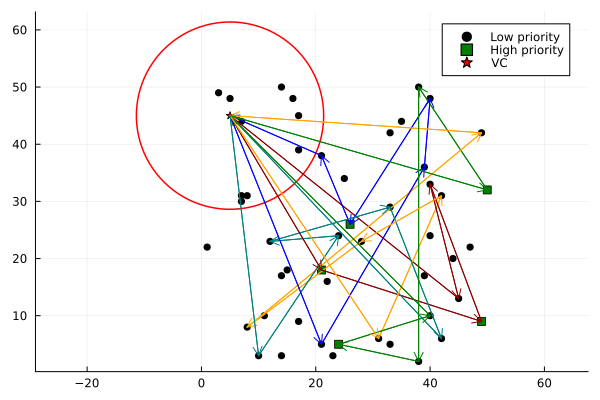

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+04]
  Cost   [1e+01, 2e+01]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+04]
Presolving model
28082 rows, 15175 cols, 143773 nonzeros  0s
24525 rows, 14584 cols, 113342 nonzeros  4s
Objective function is integral with scale 1

Solving MIP model with:
   24525 rows
   14584 cols (14534 binary, 50 integer, 0 implied int., 0 continuous)
   113342 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   1229            -inf                 inf        0      0      0         0     5.0s
         0       0         0   0.00%   537             -inf                 inf        0      0      7       913     5.6s
 R       0       0      

In [5]:
model = solve_OptVax1(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)
optimize!(model)
plot_solution(model, x_VC, y_VC, x_loc, y_loc, R, n, m, M, localities_with_high_priorities)

## With greedy Initialization ##

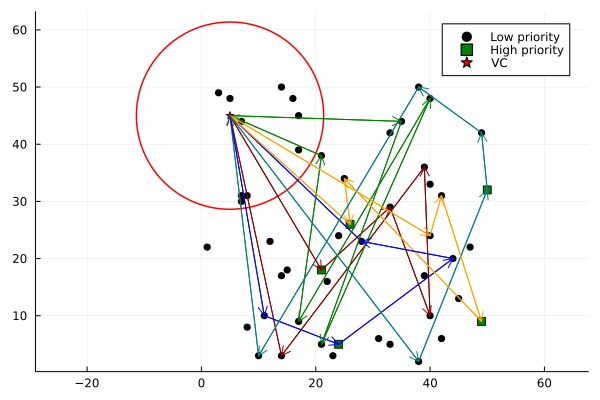

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+04]
  Cost   [1e+01, 2e+01]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+04]
Assessing feasibility of MIP using primal feasibility and integrality tolerance of       1e-06
Solution has               num          max          sum
Col     infeasibilities      0            0            0
Integer infeasibilities      0            0            0
Row     infeasibilities      0            0            0
Row     residuals            0            0            0
Presolving model
28082 rows, 15175 cols, 143773 nonzeros  0s
24525 rows, 14584 cols, 113342 nonzeros  4s

MIP start solution is feasible, objective value is 475
Objective function is integral with scale 1

Solving MIP model with:
   24525 rows
   14584 cols (14534 binary, 50 integer, 0 implied int., 0 continuous)
   113342 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds           

In [6]:
model = solve_OptVax1(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)
VC, MMTs, Budget, Q_MMTs, Q_tot = greedy_OptVax(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)
new_MMTs = local_search_2Opt(MMTs, D)
greedy_init(model, new_MMTs, VC, M, n, m, A)
optimize!(model)
plot_solution(model, x_VC, y_VC, x_loc, y_loc, R, n, m, M, localities_with_high_priorities)